In [90]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
mpl.rcParams["figure.figsize"] = (10,6)
#mpl.rcParams["figure.dpi"] = 150

In [45]:
ethnicity = pd.read_csv(
    "last_ethnicity_clean.csv",
    header=0, index_col=0, dtype='category'
    
)
last_gender = pd.read_csv(
    "last_gender_clean.csv",
    header=0, index_col=0, dtype='category'
)
this_gender = pd.read_csv(
    "this_gender_clean.csv",
    header=0, index_col=0, dtype='category'
)

from random import sample
PROJECT_READ_COLORS: list[str] = ['#03405e','#f49450', '#128099', '#58a22b']
def color_randomizer(number: int) -> list[str]:
    return sample(PROJECT_READ_COLORS, number)

#color_randomizer(3)
#this_gender.columns

In [55]:
latinos_aggregates = ethnicity.Ethnicity.value_counts()
latino_colors = color_randomizer(2)

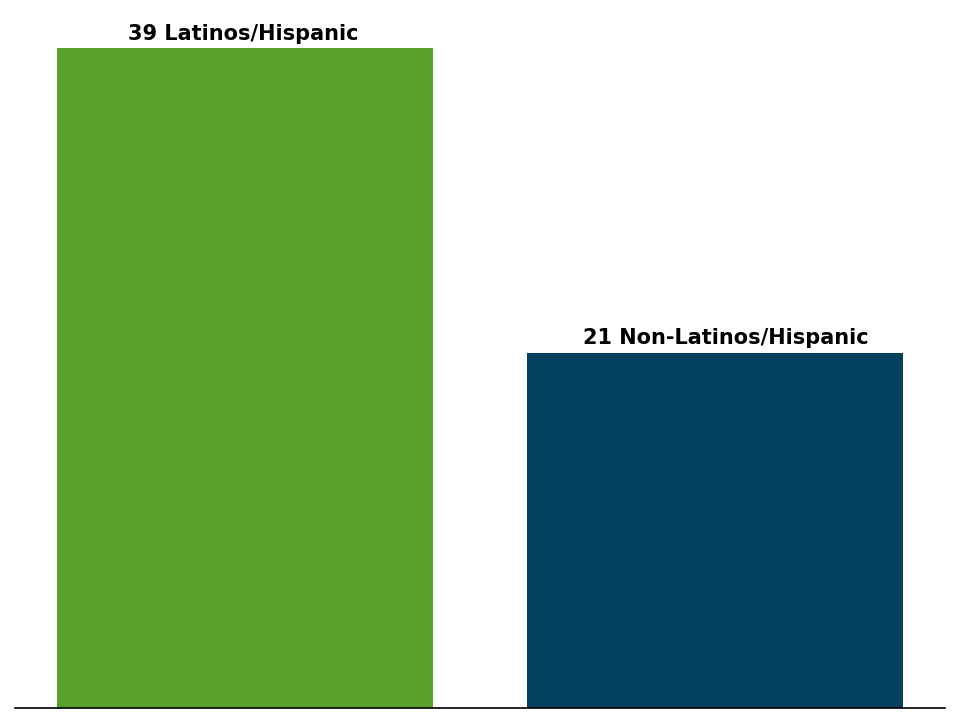

In [75]:
bars = plt.bar(
    latinos_aggregates.index, latinos_aggregates,
    color=latino_colors #["tab:olive", "tab:gray"]
);

for bar, number, category in zip(bars, latinos_aggregates, ("Latinos/Hispanic", "Non-Latinos/Hispanic")):
    plt.annotate(
        f"{number} {category}",
        xy=(bar.get_x() + bar.get_width() * 3/(len(category)), bar.get_height() + .5),
        fontweight="bold"
    )

latino_graph = plt.gcf()
# latino_graph.suptitle("Number of Latino/Hispanic Student", fontweight="bold")

axes = plt.gca()
axes.spines[["left","right","top"]].set_visible(False)
axes.set_yticks([]); axes.set_xticks([]);

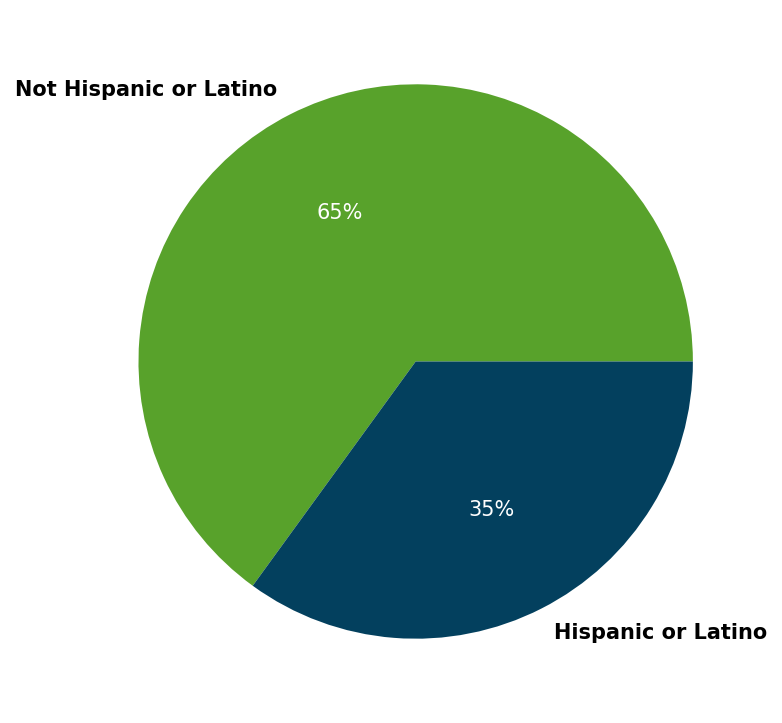

In [76]:
_, labels, texts = plt.pie(
    latinos_aggregates,
    labels=latinos_aggregates.index,
    #explode=(.05,0), # NOTE: Carlos: Not my favorite
    autopct="%1d%%",
    colors=latino_colors #["tab:olive", "tab:gray"]
);

latino_pie = plt.gcf()
# latino_pie.suptitle("Proportion of Latino/Hispanic Student", fontweight="bold")

# NOTE: super tinkering
for text in texts: text.set_color("white")
for label in labels: label.set_weight("bold")

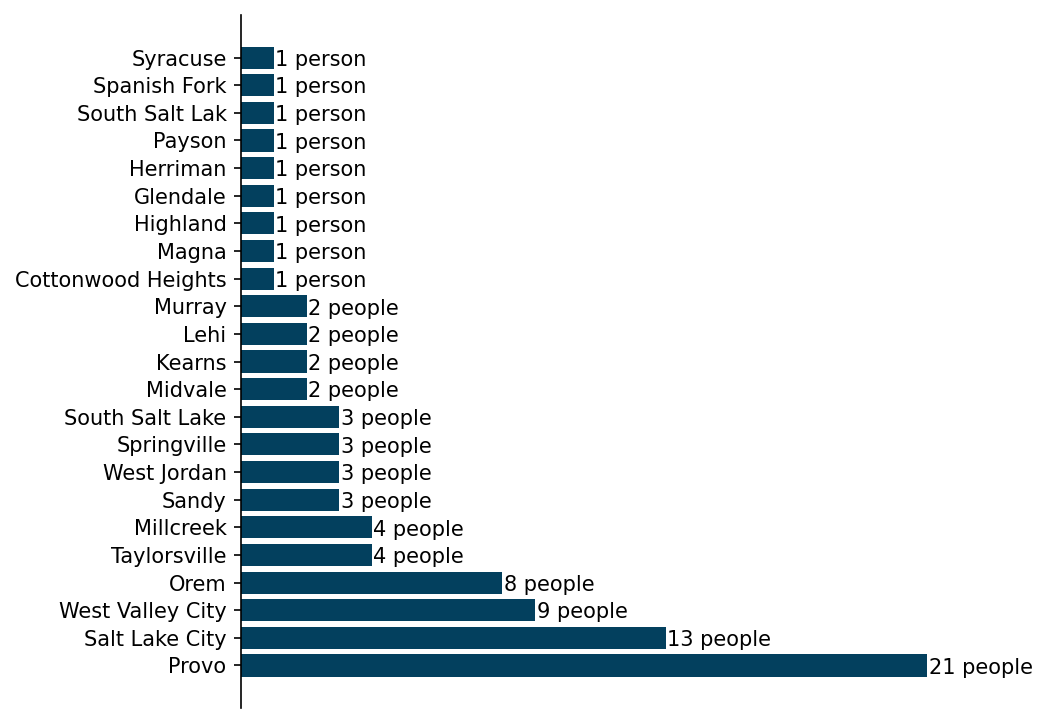

In [80]:
cities_aggregates = this_gender["Mailing Location"].value_counts()

bars = plt.barh(
    cities_aggregates.index,#["\n".join(wrap(label, 10)) for label in cities_aggregates.index],
    cities_aggregates,
    color=color_randomizer(1)
)

for bar, number in zip(bars, cities_aggregates):
    plt.annotate(
        f"{number} {"people" if number > 1 else "person"}",
        (bar.get_width() + .05, bar.get_y() + bar.get_height()/8),
    )

city_graph = plt.gcf()
#city_graph.set_size_inches(6,10)
plt.subplots_adjust(left=0.3)
#city_graph.suptitle("Number of currently enrolled students per city", fontweight="bold")
axes = plt.gca()
axes.spines[["top","right","bottom"]].set_visible(False)
axes.set_xticks([]);

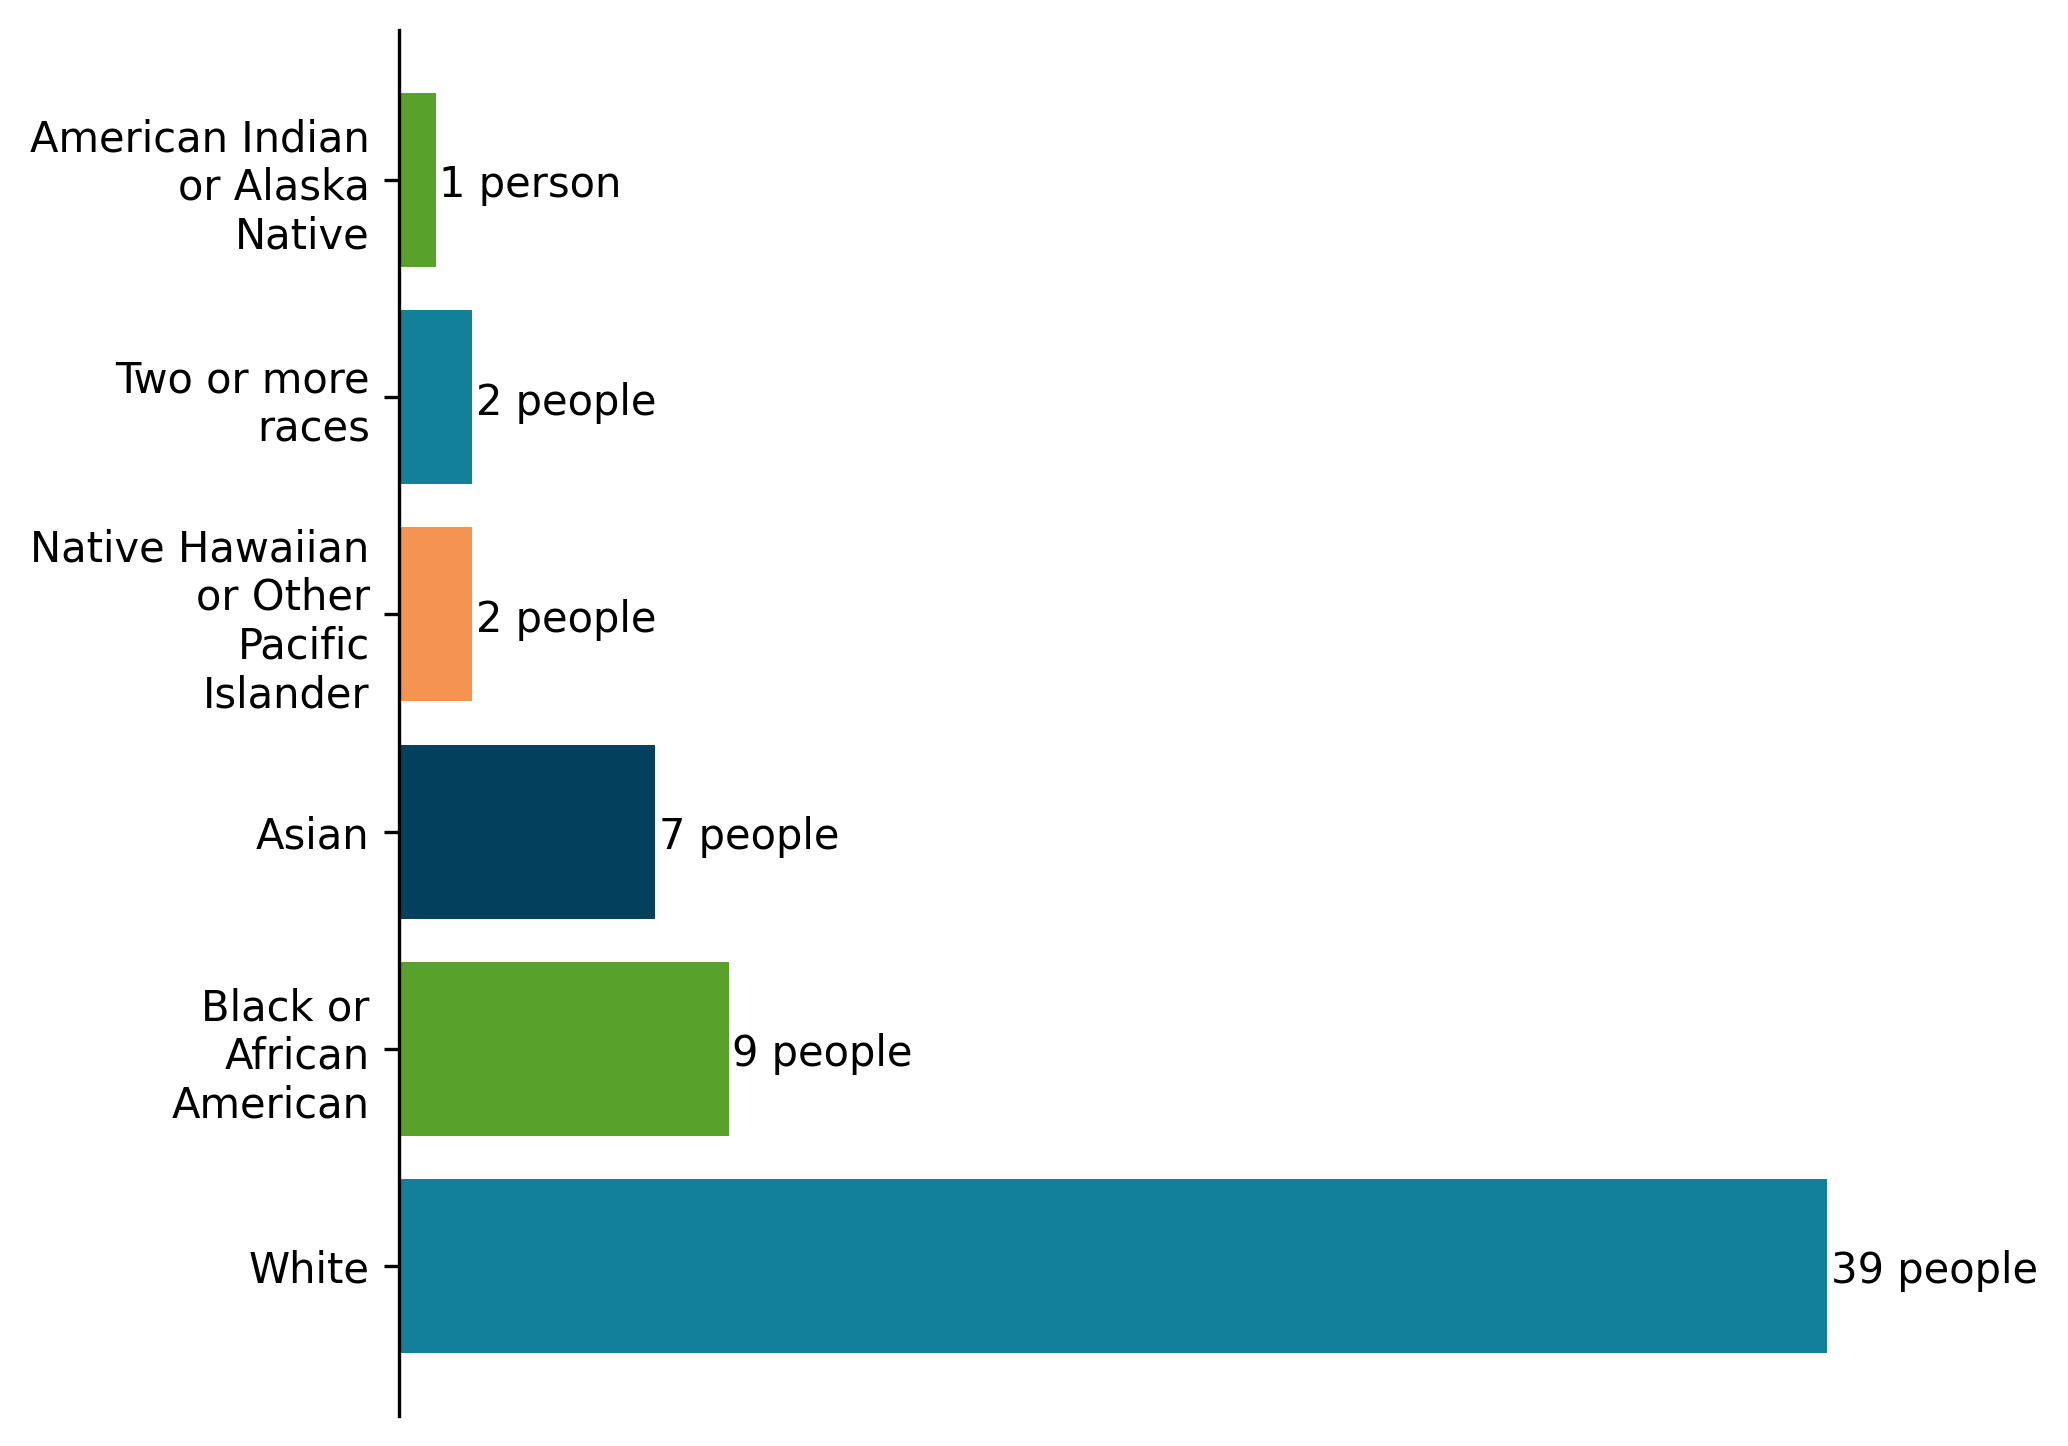

In [103]:
race_aggregates = ethnicity.Race.value_counts()
#print(race_aggregates)
from textwrap import wrap
bars = plt.barh(
    ["\n".join(wrap(label, 15)) for label in race_aggregates.index],
    race_aggregates,
    color=color_randomizer(4)#["tab:gray", "black", "tab:olive", "tab:orange", "tab:green", "tab:red"]
)

for bar, number in zip(bars, race_aggregates):
    plt.annotate(
        f"{number} {"people" if number > 1 else "person"}",
        (bar.get_width() + .1, bar.get_y() + bar.get_height()/2.5),
        #fontsize = 20
    )

race_graph = plt.gcf()
race_graph.subplots_adjust(left=.25, right=.75)
#race_graph.set_size_inches(10, 6)
# race_graph.suptitle("Number of currently enrolled students per ethnic group", fontweight="bold", #fontsize= 20 )
axes = plt.gca()
axes.spines[["top","right","bottom"]].set_visible(False)
axes.set_xticks([]);
#axes.set_yticklabels(axes.get_yticklabels(), fontsize = 20)

In [51]:
gender_aggregates = this_gender.Gender.value_counts()
gender_colors = color_randomizer(2)

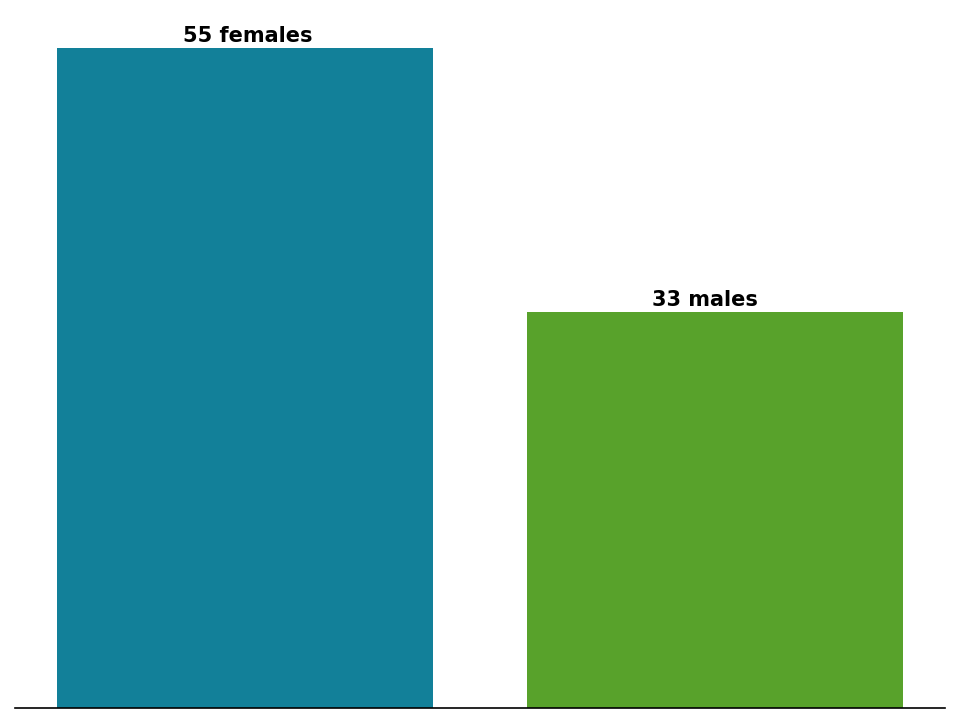

In [83]:
bars = plt.bar(
    gender_aggregates.index,
    gender_aggregates,
    color=gender_colors#["tab:pink","tab:blue"]
);

for bar, number, gender in zip(bars, gender_aggregates, gender_aggregates.index):
    plt.annotate(
        f"{number} {gender.lower()}s",
        xy=(bar.get_x() + bar.get_width()/3, bar.get_height() + .5),
        weight="bold"
    )

gender_graph = plt.gcf()
# gender_graph.suptitle("Number of currently enrolled students per gender", fontweight="bold")

axes = plt.gca()
axes.spines[["left","right","top"]].set_visible(False)
axes.set_yticks([]); axes.set_xticks([]);

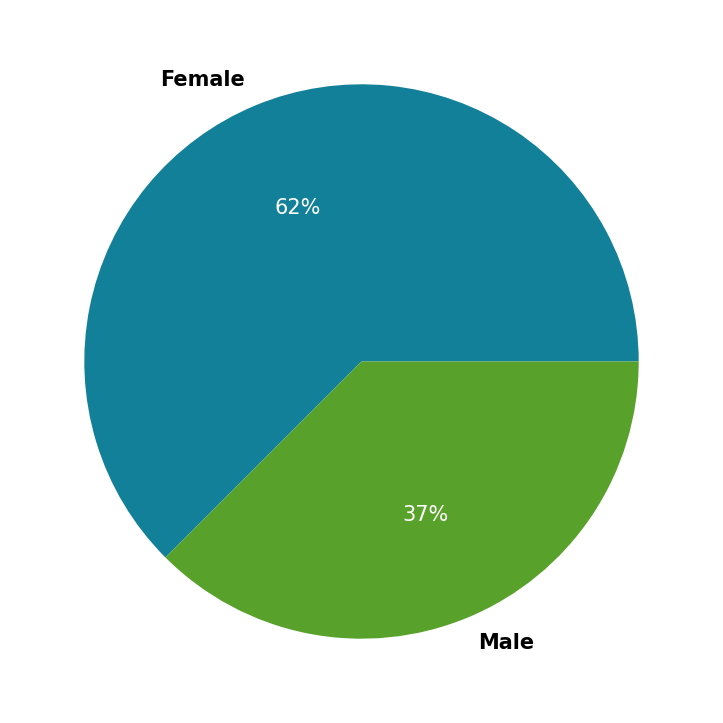

In [84]:
_, labels, text = plt.pie(
    gender_aggregates,
    labels=gender_aggregates.index,
    autopct="%1d%%",
    colors=gender_colors#["tab:pink", "tab:blue"]
);
gender_pie = plt.gcf()
# gender_pie.suptitle("Proportion of currently enrolled students per gender", fontweight="bold")

# NOTE: super tinkering
for obj in text: obj.set_color("white")
for label in labels: label.set_weight("bold")

In [104]:
# NOTE: Adjusting into presentation resolution: 300 * (8, 6) = (2400, 1800) pxls
mpl.rcParams["figure.dpi"] = 300
extension = ".svg"
# NOTE: Barcharts
latino_graph.savefig("latino" + extension)
race_graph.savefig("race" + extension)
city_graph.savefig("city" + extension)
gender_graph.savefig("gender" + extension)

# NOTE: Pie charts
latino_pie.savefig("latino_pie" + extension)
gender_pie.savefig("gender_pie" + extension)